In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


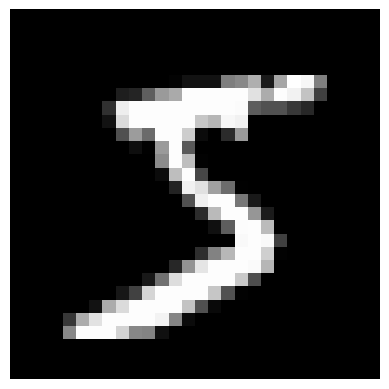

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

Data preprocessing


In [3]:
# normalization

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [4]:
# Reshape for CNN

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [6]:
# onehot encoding the label data for CNN

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [5]:
# Flatten for SVM and Rndom Forest

x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

Model implementation

In [7]:
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [8]:
# CNN model

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# training the CNN model.

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model.fit(x_train_cnn, y_train_cat, epochs=8, batch_size=125, verbose=1)

Epoch 1/8
480/480 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - accuracy: 0.9473 - loss: 0.1721
Epoch 2/8
480/480 ━━━━━━━━━━━━━━━━━━━━ 98s 123ms/step - accuracy: 0.9814 - loss: 0.0634
Epoch 3/8
480/480 ━━━━━━━━━━━━━━━━━━━━ 69s 97ms/step - accuracy: 0.9876 - loss: 0.0424
Epoch 4/8
480/480 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.9902 - loss: 0.0322
Epoch 5/8
480/480 ━━━━━━━━━━━━━━━━━━━━ 55s 114ms/step - accuracy: 0.9917 - loss: 0.0266
Epoch 6/8
480/480 ━━━━━━━━━━━━━━━━━━━━ 75s 98ms/step - accuracy: 0.9935 - loss: 0.0208
Epoch 7/8
480/480 ━━━━━━━━━━━━━━━━━━━━ 78s 90ms/step - accuracy: 0.9942 - loss: 0.0185
Epoch 8/8
480/480 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - accuracy: 0.9953 - loss: 0.0163


In [11]:
# SVM model

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(x_train_flat[:10000], y_train[:10000])

SVC(probability=True)

In [12]:

# RAndom Forrest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train_flat[:10000], y_train[:10000])

RandomForestClassifier()

Model Evaluation

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
cnn_preds = cnn_model.predict(x_test_cnn)
cnn_preds_labels = np.argmax(cnn_preds, axis=1)
cnn_acc = accuracy_score(y_test, cnn_preds_labels)
print("CNN Accuracy:", cnn_acc)

svm_preds = svm_model.predict(x_test_flat)
svm_acc = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_acc)

rf_preds = rf_model.predict(x_test_flat)
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
CNN Accuracy: 0.9906
SVM Accuracy: 0.9594
Random Forest Accuracy: 0.9484


Ensemble LEarning

In [16]:
from scipy.stats import mode

cnn_preds_class = cnn_preds_labels
svm_preds_class = svm_preds
rf_preds_class = rf_preds

combined_preds = np.vstack([cnn_preds_class, svm_preds_class, rf_preds_class])

ensemble_preds, _ = mode(combined_preds, axis=0)
ensemble_preds = ensemble_preds.flatten()

# comparing models
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print("Ensemble Accuracy:", ensemble_acc)


Ensemble Accuracy: 0.9681


In [17]:
# majority voting ensemble.

print("CNN Accuracy:", cnn_acc)
print("SVM Accuracy:", svm_acc)
print("Random Forest Accuracy:", rf_acc)

CNN Accuracy: 0.9906
SVM Accuracy: 0.9594
Random Forest Accuracy: 0.9484
